In [1]:
state_weather = ("sunny", "cloudy", "rainy")

In [2]:
import numpy as np

transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

Задание 1. Выберите произвольное начальное состояние ("sunny", "cloudy" или "rainy") и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [3]:
import random

start_state = "sunny"
states = [start_state]

for _ in range(20000):
    current_state = states[-1]
    if current_state == "sunny":
        next_state = np.random.choice(state_weather, p=transition_matrix[0])
    elif current_state == "cloudy":
        next_state = np.random.choice(state_weather, p=transition_matrix[1])
    else:
        next_state = np.random.choice(state_weather, p=transition_matrix[2])
    states.append(next_state)
    
states = states[1:]
len(states)

20000

In [4]:
states[0:10]


['cloudy',
 'sunny',
 'cloudy',
 'cloudy',
 'rainy',
 'cloudy',
 'sunny',
 'sunny',
 'cloudy',
 'rainy']

Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды. Должна получиться примерно следующая картинка:

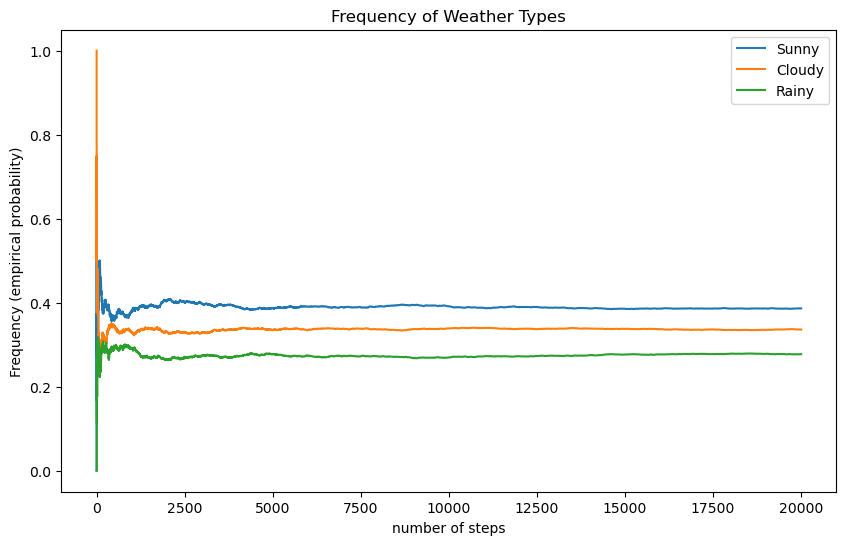

In [5]:
import matplotlib.pyplot as plt

freq_sunny = [states[:n].count("sunny")/n for n in range(1, 20001)]
freq_cloudy = [states[:n].count("cloudy")/n for n in range(1, 20001)]
freq_rainy = [states[:n].count("rainy")/n for n in range(1, 20001)]

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20001), freq_sunny, label='Sunny')
plt.plot(range(1, 20001), freq_cloudy, label='Cloudy')
plt.plot(range(1, 20001), freq_rainy, label='Rainy')
plt.xlabel('number of steps')
plt.ylabel('Frequency (empirical probability)')
plt.title('Frequency of Weather Types')
plt.legend()
plt.show()

Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей, а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
stat_distr = np.array(eigenvectors[:, np.where(np.isclose(eigenvalues, 1))[0][0]].flat) #stat measure
stat_distr = stat_distr / stat_distr.sum() #normiryem

print("Stationary Distribution:", stat_distr)

Stationary Distribution: [0.38888889 0.33333333 0.27777778]


In [7]:
P = np.linalg.matrix_power(transition_matrix, 10)
print("Matrix Power:", P)

Matrix Power: [[0.38894132 0.33333333 0.27772535]
 [0.38887141 0.33333333 0.27779525]
 [0.38883646 0.33333333 0.27783021]]


In [8]:
P = np.linalg.matrix_power(transition_matrix, 30)
print("Matrix Power:", P)

Matrix Power: [[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


In [9]:
P = np.linalg.matrix_power(transition_matrix, 100)
print("Matrix Power:", P)

Matrix Power: [[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


Задание 5. Методом Метрополиса — Гастингса постройте выборку из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей B = [[40, -26], [-26, 25]]. Сравните плоность по выборке (двумерную гистограмму) и теоретическую плотность.

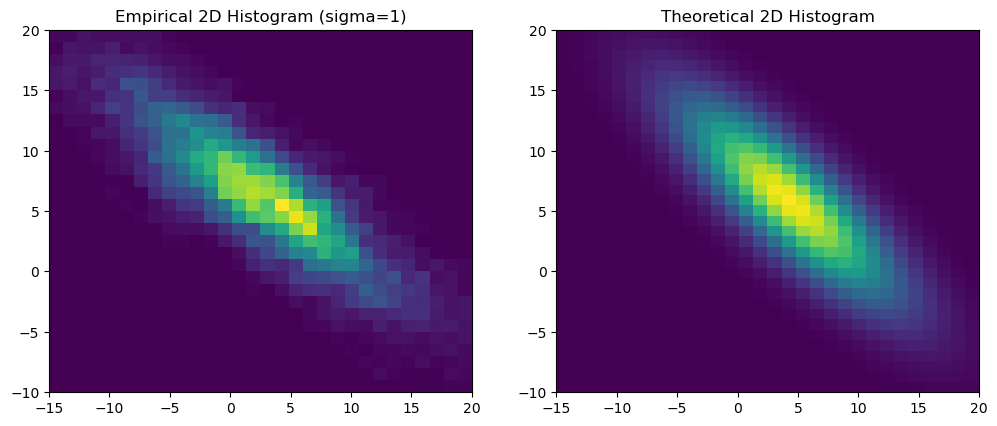

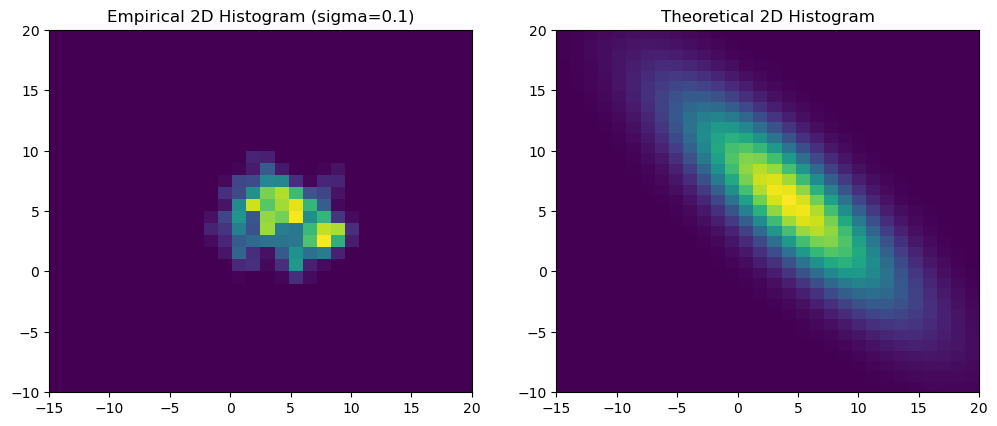

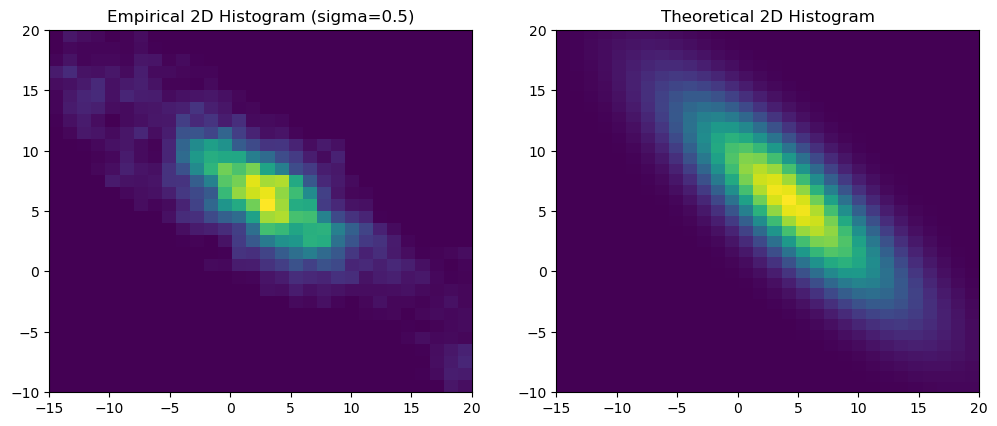

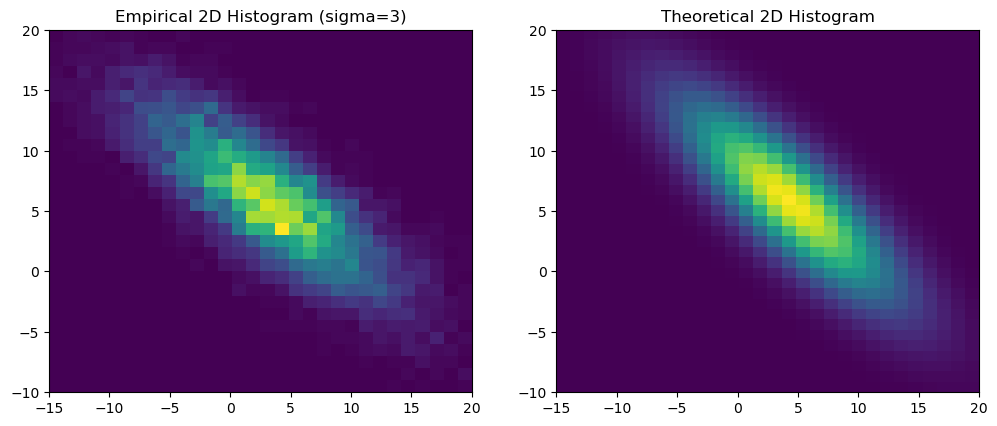

In [10]:
from scipy.stats import multivariate_normal

mean = np.array([3,6]) 
covariance = np.array([[40, -26], [-26, 25]]) 

def proposal(current, sigma, **kwargs): 
    _ = kwargs 
    current = np.asarray(current) 
    sigma = np.asarray(sigma) 
    return current + sigma * np.random.randn(*current.shape)

def mixture (x, **kwargs): 
    _ = kwargs 
    return multivariate_normal(mean,covariance).pdf(x)

def metroplis(start, value, proposal, n, infinum, **kwargs): 
    current = start 
    post = [current] 
    for i in range(n): 
        candidate = proposal(current, **kwargs)
        acceptance = value(candidate, **kwargs) / value(current, **kwargs) 
        if np.random.rand() < acceptance: 
            current = candidate
            post.append(current) 
    return post[infinum:] 
 
#sigma=1
post = np.array(metroplis(np.array([0,0]), mixture, proposal, 20000, 2000, sigma=1))  

plt.figure(figsize=(12, 12)) 

x_min, x_max = -15, 20 
y_min, y_max = -10, 20 

x, y = np.mgrid[x_min:x_max, y_min:y_max] 
pos = np.dstack((x, y)) 
rv = multivariate_normal(mean, covariance) 
pdf = rv.pdf(pos) 
 

plt.subplot(1, 2, 1, aspect='equal') 
plt.hist2d(post[:, 0], post[:, 1], bins=30, range=[[x_min, x_max], [y_min, y_max]]) 
plt.title('Empirical 2D Histogram (sigma=1)') 
  
plt.subplot(1, 2, 2, aspect='equal') 
plt.imshow(pdf, origin='lower', extent=(x_min, x_max, y_min, y_max))
plt.title('Theoretical 2D Histogram')  
 
plt.show()


#sigma=0.1
post = np.array(metroplis(np.array([0,0]), mixture, proposal, 20000, 2000, sigma=0.1))  

plt.figure(figsize=(12, 12)) 

plt.subplot(1, 2, 1, aspect='equal') 
plt.hist2d(post[:, 0], post[:, 1], bins=30, range=[[x_min, x_max], [y_min, y_max]]) 
plt.title('Empirical 2D Histogram (sigma=0.1)') 
  
plt.subplot(1, 2, 2, aspect='equal') 
plt.imshow(pdf, origin='lower', extent=(x_min, x_max, y_min, y_max))
plt.title('Theoretical 2D Histogram')  
 
plt.show()


#sigma=0.5
post = np.array(metroplis(np.array([0,0]), mixture, proposal, 20000, 2000, sigma=0.5))  
plt.figure(figsize=(12, 12)) 

plt.subplot(1, 2, 1, aspect='equal') 
plt.hist2d(post[:, 0], post[:, 1], bins=30, range=[[x_min, x_max], [y_min, y_max]]) 
plt.title('Empirical 2D Histogram (sigma=0.5)') 
  
plt.subplot(1, 2, 2, aspect='equal') 
plt.imshow(pdf, origin='lower', extent=(x_min, x_max, y_min, y_max))
plt.title('Theoretical 2D Histogram')  
 
plt.show()

#sigma=2
post = np.array(metroplis(np.array([0,0]), mixture, proposal, 20000, 2000, sigma=3))  
plt.figure(figsize=(12, 12)) 
 
plt.subplot(1, 2, 1, aspect='equal') 
plt.hist2d(post[:, 0], post[:, 1], bins=30, range=[[x_min, x_max], [y_min, y_max]]) 
plt.title('Empirical 2D Histogram (sigma=3)') 
  
plt.subplot(1, 2, 2, aspect='equal') 
plt.imshow(pdf, origin='lower', extent=(x_min, x_max, y_min, y_max))
plt.title('Theoretical 2D Histogram')  
 
plt.show()

Задание 6. Решите задачу 5 методом cэмплирования по Гиббсу.

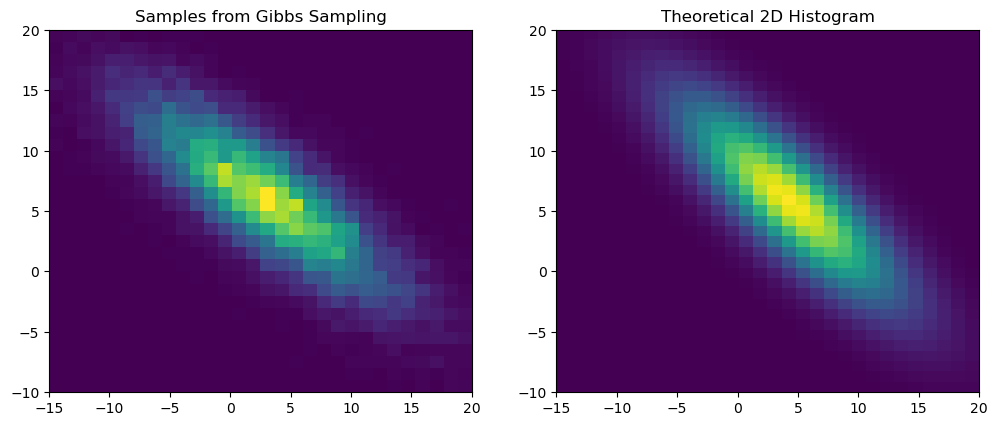

In [11]:
mean = np.array([3, 6])
cov = np.array([[40, -26], [-26, 25]])

#Функция для сэмплирования по Гиббсу
def gibbs_sampling(mean, cov, num=20000):
    samples = np.zeros((num, 2))
    current_sample = np.array([np.random.normal(mean[0], np.sqrt(cov[0,0])) , np.random.normal(mean[1], np.sqrt(cov[1,1]))]) # Начальное значение

    for i in range(num):
        # Сэмплирование первой переменной
        mean_x_given_y = mean[0] + cov[0, 1] / cov[1, 1] * (current_sample[1] - mean[1])
        current_sample[0] = np.random.normal(mean_x_given_y, np.sqrt(cov[0, 0]-cov[0,1]**2/cov[1,1]))
        
        # Сэмплирование второй переменной
        mean_y_given_x = mean[1] + cov[1, 0] / cov[0, 0] * (current_sample[0] - mean[0])
        current_sample[1] = np.random.normal(mean_y_given_x, np.sqrt(cov[1, 1]-cov[0,1]**2/cov[0,0]))

        samples[i] = current_sample

    return samples

samples = gibbs_sampling(mean, cov)

plt.figure(figsize=(12, 12)) 

x_min, x_max = -15, 20 
y_min, y_max = -10, 20 

x, y = np.mgrid[x_min:x_max, y_min:y_max] 
pos = np.dstack((x, y)) 
rv = multivariate_normal(mean, covariance) 
pdf = rv.pdf(pos) 
 
plt.subplot(1, 2, 1, aspect='equal') 
plt.hist2d(samples[:, 0], samples[:, 1], bins=30, range=[[x_min, x_max], [y_min, y_max]]) 
plt.title('Samples from Gibbs Sampling') 
  
plt.subplot(1, 2, 2, aspect='equal') 
plt.imshow(pdf, origin='lower', extent=(x_min, x_max, y_min, y_max))
plt.title('Theoretical 2D Histogram')  
 
plt.show()